In [2]:
import pandas as pd

In [3]:
df = pd.read_feather("100k_kindle_reviews_lemmatized_with_summary.feather")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 51 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   overall                100000 non-null  int64  
 1   verified               100000 non-null  bool   
 2   reviewTime             100000 non-null  object 
 3   reviewerID             100000 non-null  object 
 4   asin                   100000 non-null  object 
 5   style                  100000 non-null  object 
 6   reviewerName           100000 non-null  object 
 7   reviewText             100000 non-null  object 
 8   summary                100000 non-null  object 
 9   unixReviewTime         100000 non-null  int64  
 10  vote                   100000 non-null  int32  
 11  image                  70 non-null      object 
 12  lemmatized_reviewText  100000 non-null  object 
 13  ADV_review             80797 non-null   float64
 14  VERB_review            91419 non-null

In [5]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,...,PUNCT_summary,VERB_summary,DET_summary,NUM_summary,CCONJ_summary,SCONJ_summary,INTJ_summary,SPACE_summary,SYM_summary,X_summary
0,1,True,"12 27, 2014",A3JRP9RI3ZE6VK,B00JQDHIES,{'Format:': ' Kindle Edition'},e-BOOK,Truly hate it when I make a bad call on a book...,Juvenile,1419638400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,False,"06 25, 2016",A3IZWB0YUZXZZ6,B01H124NQQ,{'Format:': ' Kindle Edition'},Kathryn childs,Only 4% of this book is the discretion it isn'...,Not worth your time,1466812800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,True,"05 13, 2013",A82LP6E48UFM5,B00C2E9EK4,{'Format:': ' Kindle Edition'},Amazon Customer,The quality of writing for this book is very p...,poor quality,1368403200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,True,"05 10, 2012",AMV9B31WKSLM7,B005RH2GNU,{'Format:': ' Kindle Edition'},Eclectic Reader,"The Outback is the vast, remote, arid area of ...",Outback is in AUSTRALIA!!!,1336608000,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,True,"09 4, 2013",AZ27B4OUL64TR,B00DC7PXLY,{'Format:': ' Kindle Edition'},Word Junkie,"Grace Burrowes lives within a few miles of me,...",Not as good as its progenitor,1378252800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
review_speech_count_columns = [col for col in df.columns if col.endswith('_review')]
df[review_speech_count_columns] = df[review_speech_count_columns].fillna(0)

summary_speech_count_columns = [col for col in df.columns if col.endswith('_summary')]
df[summary_speech_count_columns] = df[summary_speech_count_columns].fillna(0)

In [ ]:
df.head()

In [8]:
# if image is non null return 1 else 0
df['image'] = df['image'].notnull().astype('int')

replace null with empty string

In [9]:
# in review text replace null values with empty string
df['reviewText'] = df['reviewText'].fillna('')
df['summary'] = df['summary'].fillna('')

convert verfied to dummy

In [10]:
# convert verified to int 1 if true 0 if false
df['verified'] = df['verified'].astype('int')

In [11]:
df = df.drop(columns=['style'])

dropped reviewtime, already have unix representation

In [12]:
# drop the reviewTime column
df = df.drop(columns='reviewTime')

creating review length column

In [13]:
# create a new column called reviewLength
df['reviewLength'] = df['reviewText'].apply(lambda x: 0 if isinstance(x, float) else len(x))

creating summary length column

In [14]:
# create a new column called summaryLength (There were some NaN values in summary, which was forcing the type to be float64.  This ensures everything is an int).
df['summaryLength'] = df['summary'].apply(lambda x: 0 if isinstance(x, float) else len(x))

asin is the amazon product id. removing this and the reviewer info

In [15]:
# removing asin, reviewerID, reviewerName
df = df.drop(columns=['asin', 'reviewerID', 'reviewerName'])

labeling categorical variables

In [16]:
# labeling ['verified', 'image'] as categorical
df[['overall', 'verified', 'image']] = df[['overall', 'verified', 'image']].astype('category')

reviewing data

In [17]:
df.head()

,overall,verified,reviewText,summary,unixReviewTime,vote,image,lemmatized_reviewText,ADV_review,VERB_review,...,DET_summary,NUM_summary,CCONJ_summary,SCONJ_summary,INTJ_summary,SPACE_summary,SYM_summary,X_summary,reviewLength,summaryLength
0,1,1,Truly hate it when I make a bad call on a book...,Juvenile,1419638400,0,0,truly hate bad book waste money . honestly fin...,4.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,272,8
1,1,0,Only 4% of this book is the discretion it isn'...,Not worth your time,1466812800,0,0,4 % book discretion worth time money . say 800...,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106,19
2,1,1,The quality of writing for this book is very p...,poor quality,1368403200,0,0,quality writing book poor . understand insta...,6.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,425,12
3,1,1,"The Outback is the vast, remote, arid area of ...",Outback is in AUSTRALIA!!!,1336608000,0,0,"Outback vast , remote , arid area Australia ac...",1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,145,26
4,1,1,"Grace Burrowes lives within a few miles of me,...",Not as good as its progenitor,1378252800,0,0,"Grace Burrowes live mile , want tell enjoy Gro...",13.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1235,29


Number of training samples: 75000
Micro-averaged F1 score on test set: 0.530
Accuracy of model: 0.5301


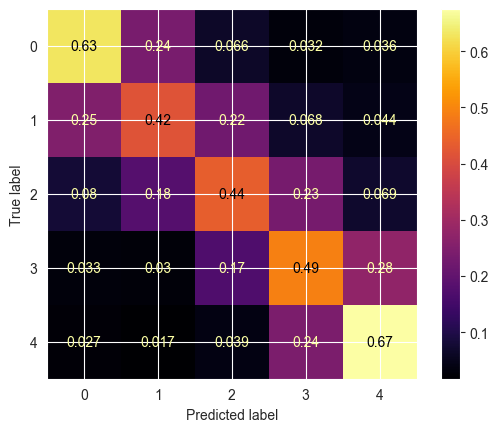

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pipeline = Pipeline(steps=[
    ("vect", CountVectorizer()),
    ("tfidf", TfidfTransformer()),
    ("clf", SGDClassifier())
])

best_params = {
    'vect__ngram_range': (1, 3),
    'vect__stop_words': None,
    'vect__strip_accents': None,
    'tfidf__norm': 'l2',
    'tfidf__sublinear_tf': True,
    'tfidf__use_idf': True,
    'clf__alpha': 1e-05, 
    'clf__loss': 'log_loss', 
    'clf__penalty': 'elasticnet', 
}

classifier = pipeline.set_params(**best_params)

# The space is important, otherwise this accidentally creates joined words.
X, y = df['lemmatized_reviewText'] + " " + df['lemmatized_summary'], df['overall']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=55)

print("Number of training samples:", len(X_train))

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Micro-averaged F1 score on test set: %0.3f"% f1_score(y_test, y_pred, average="micro"))

accuracy = classifier.score(X_test, y_test)
print(f"Accuracy of model: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='inferno')

NameError: name 'plt' is not defined

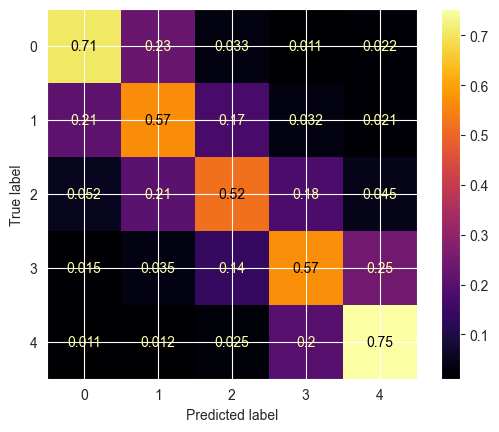

In [19]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='inferno')
plt.grid(None)
plt.show()